<a href="https://colab.research.google.com/github/OptimizationExpert/Pyomo/blob/main/Kmeans_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyomo
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

In [ ]:
random.seed(100)
N = 30
df = pd.DataFrame()
df['x1'] = [random.randint(1,50) for i in range(N)]
df['x2'] = [random.randint(1,50) for i in range(N)]
df

,x1,x2
0,10,23
1,30,24
2,30,41
3,50,27
4,12,14
5,46,26
6,26,30
7,47,36
8,23,18
9,28,25


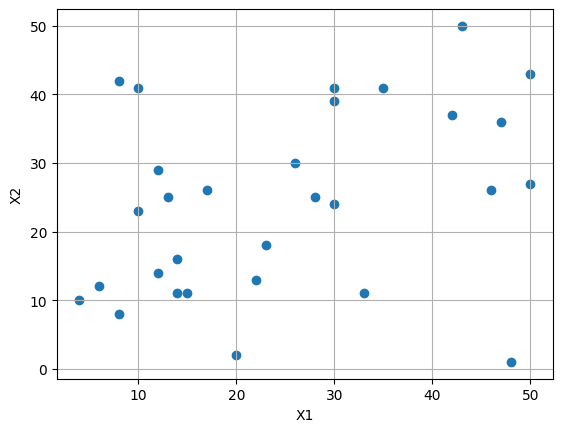

In [ ]:
plt.scatter(df['x1'],df['x2'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()

In [ ]:
clusters = {k:[random.randint(1,50) , random.randint(1,50)] for k in range(2)}
clusters

{0: [9, 40], 1: [36, 49]}

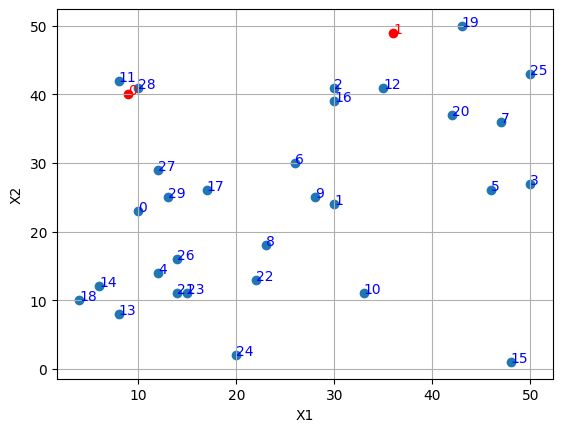

In [ ]:

plt.scatter(df['x1'],df['x2'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()
for i in range(len(df)):
  plt.text(df['x1'][i],df['x2'][i],s= str(i), c='blue')
for k , [x0,y0] in clusters.items():
  plt.scatter(x0,y0,c='red')
  plt.text(x0,y0,s= str(k), c='red')

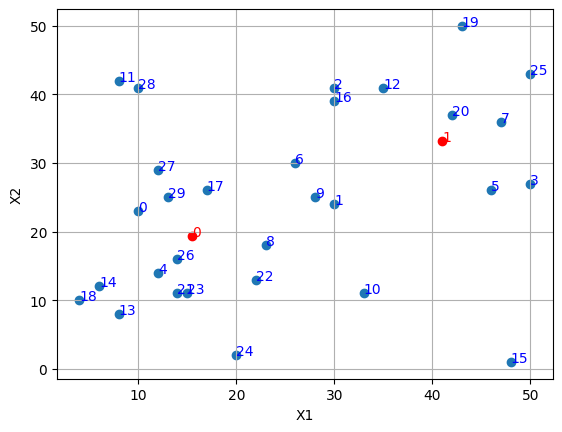

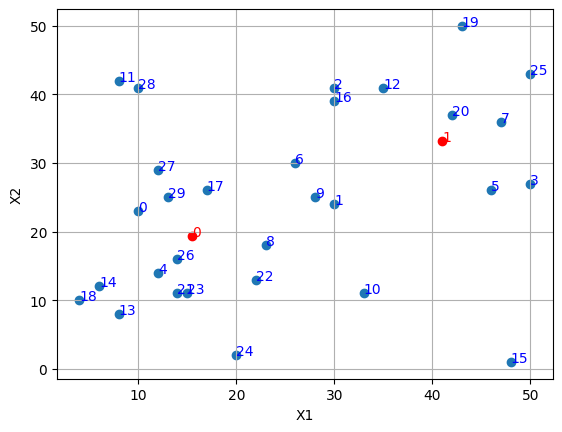

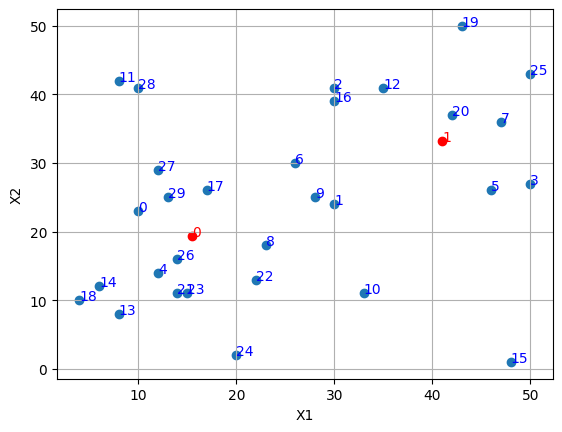

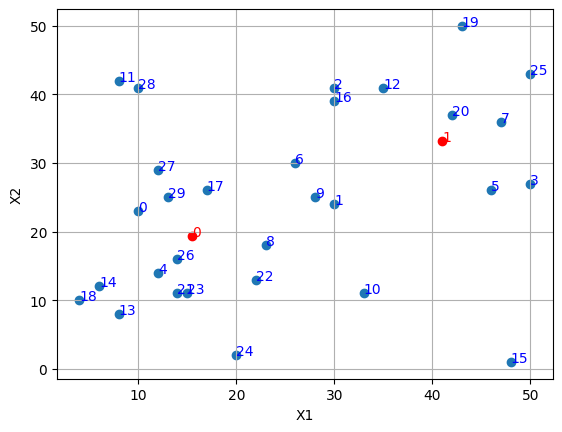

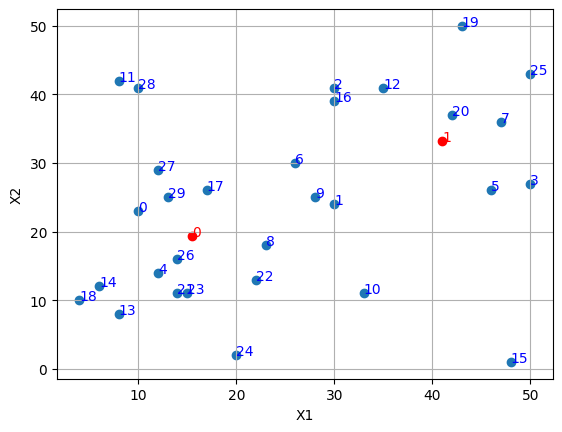

In [ ]:
for counter in range(5):

  assign = {}
  for i in range(len(df)):
    x1,y1 = df['x1'][i],df['x2'][i]
    d={}
    for k,[x0,y0] in clusters.items():
      d[k] = ((x1-x0)**2 + (y1-y0)**2)**0.5
    assign[i]= min(d,key=d.get)

  assign

  belong = {}
  for k in clusters.keys():
    belong[k] = [i for i in range(len(df)) if assign[i]==k]
    xavg = sum([df['x1'][i] for i in belong[k]])/len(belong[k])
    yavg = sum([df['x2'][i] for i in belong[k]])/len(belong[k])
    clusters[k] = [xavg, yavg]

  clusters
  plt.figure()
  plt.scatter(df['x1'],df['x2'])
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.grid()
  for i in range(len(df)):
    plt.text(df['x1'][i],df['x2'][i],s= str(i), c='blue')
  for k , [x0,y0] in clusters.items():
    plt.scatter(x0,y0,c='red')
    plt.text(x0,y0,s= str(k), c='red')

In [ ]:
belong

{0: [0, 4, 6, 8, 9, 10, 11, 13, 14, 17, 18, 21, 22, 23, 24, 26, 27, 28, 29],
 1: [1, 2, 3, 5, 7, 12, 15, 16, 19, 20, 25]}

In [ ]:
!wget -N -q "https://github.com/thomasfork/ipopt_linux/raw/main/ipopt-linux64.zip"
!unzip -o -q ipopt-linux64

opt = SolverFactory('ipopt', executable='/content/ipopt')


from pyomo import environ as pe
import os

os.environ['NEOS_EMAIL'] = 'XXXXXX@gmail.com'
solver_manager = pe.SolverManagerFactory('neos')




In [ ]:
model = AbstractModel()
model.i = RangeSet(len(df))
model.c = RangeSet(2)
features = [f for f in df.columns if f not in ['y'] ]
model.x = Var(model.i, model.c, within = Binary)
model.d = Var(model.i,model.c, bounds=(0,5000), within = Reals)
M = 10000
model.f = Set(initialize = features)
model.mu = Var(model.c,model.f, bounds=(0,5000), within = Reals)

def rule_c1(model,i,c):
  Dic = sum( (model.mu[c,f]-df.loc[i-1,f])**2 for f in model.f)
  return model.d[i,c] >= Dic - M*(1-model.x[i,c])
model.C1 = Constraint(model.i, model.c, rule = rule_c1)

def rule_c2(model,i):
  return sum(model.x[i,c] for c in model.c) == 1
model.C2 = Constraint(model.i, rule = rule_c2)

def rule_obj(model):
  return sum(model.d[i,c] for i in model.i for c in model.c)
  #return sum(model.d[i,c] for (i,c) in model.d)

model.obj = Objective(rule = rule_obj, sense = minimize)
instance = model.create_instance()
#results = opt.solve(instance)
solver_manager = pe.SolverManagerFactory('neos')
results = solver_manager.solve(instance, solver = "cplex")
# CONOPT SNOPT KNITro


from pyomo.opt import SolverStatus, TerminationCondition
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
     print ("this is optimal")
elif results.solver.termination_condition == TerminationCondition.infeasible:
     print ("do something about it? or exit?")
else:
     print ('ERROR ' + str(results.solver))

# CPLEX
# Gurobi
# Mosek (maybe)



for (i,c), v in instance.x.items():
  if v.value>0:
    print(i,c)


this is optimal
1 2
2 1
3 1
4 1
5 2
6 1
7 1
8 1
9 2
10 1
11 2
12 2
13 1
14 2
15 2
16 1
17 1
18 2
19 2
20 1
21 1
22 2
23 2
24 2
25 2
26 1
27 2
28 2
29 2
30 2


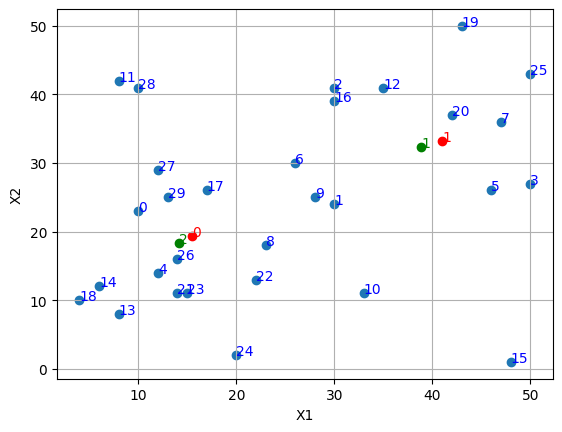

In [ ]:
plt.figure()
plt.scatter(df['x1'],df['x2'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()
for i in range(len(df)):
  plt.text(df['x1'][i],df['x2'][i],s= str(i), c='blue')
for k , [x0,y0] in clusters.items():
  plt.scatter(x0,y0,c='red')
  plt.text(x0,y0,s= str(k), c='red')


for k in instance.c:
  x0,y0 = instance.mu[k,'x1'].value,instance.mu[k,'x2'].value
  plt.scatter(x0,y0,c='green')
  plt.text(x0,y0,s= str(k), c='green')




In [ ]:
model = AbstractModel()
model.i = RangeSet(len(df))
model.j = RangeSet(len(df))

features = [f for f in df.columns if f not in ['y'] ]
model.x = Var(model.i, model.j, within = Binary)
model.s = Var(model.j, within = Binary)
#model.z = Var(model.i, model.j, within = Binary)
model.z = Var(model.i, model.j,  bounds=(0,1), within = Reals)


model.d = Var(model.i,model.j, bounds=(0,5000), within = Reals)
M = 10000
model.f = Set(initialize = features)

def rule_c1(model,i,j):
  Dic = sum( (df.loc[i-1,f]-df.loc[j-1,f])**2 for f in model.f)
  #Dic = sum( abs(df.loc[i-1,f]-df.loc[j-1,f]) for f in model.f)
  return model.d[i,j] >= Dic - M*(1-model.z[i,j])
model.C1 = Constraint(model.i, model.j, rule = rule_c1)

def rule_c2(model,i):
  return sum(model.x[i,j] for j in model.j) == 1
model.C2 = Constraint(model.i, rule = rule_c2)

def rule_c3A(model,i,j):
  return model.z[i,j] <= model.x[i,j]
model.C3A = Constraint(model.i, model.j, rule = rule_c3A)

def rule_c3B(model,i,j):
  return model.z[i,j] <= model.s[j]
model.C3B = Constraint(model.i, model.j, rule = rule_c3B)

def rule_c3C(model,i,j):
  return model.z[i,j] >= model.x[i,j] + model.s[j] -1
model.C3C = Constraint(model.i, model.j, rule = rule_c3C)


def rule_c4(model):
  return sum(model.s[j] for j in model.j) == 2
model.C4 = Constraint( rule = rule_c4)

def rule_c5(model,i,j):
  return model.x[i,j] <= model.s[j]
model.C5 = Constraint(model.i, model.j, rule = rule_c5)



def rule_obj(model):
  return sum(model.d[i,j] for i in model.i for j in model.j)

model.obj = Objective(rule = rule_obj, sense = minimize)
instance = model.create_instance()
#results = opt.solve(instance)
solver_manager = pe.SolverManagerFactory('neos')
results = solver_manager.solve(instance, solver = "cplex")
# CONOPT SNOPT KNITro


from pyomo.opt import SolverStatus, TerminationCondition
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
     print ("this is optimal")
elif results.solver.termination_condition == TerminationCondition.infeasible:
     print ("do something about it? or exit?")
else:
     print ('ERROR ' + str(results.solver))

# CPLEX
# Gurobi
# Mosek (maybe)

for j in instance.j:
  if instance.s[j].value>0:
    print(j)

for (i,j), v in instance.x.items():
  if v.value>0:
    print(i,j)
print("OF = ", value(instance.obj))

this is optimal
21
27
1 27
2 21
3 21
4 21
5 27
6 21
7 21
8 21
9 27
10 27
11 27
12 27
13 21
14 27
15 27
16 21
17 21
18 27
19 27
20 21
21 21
22 27
23 27
24 27
25 27
26 21
27 27
28 27
29 27
30 27
OF =  6130.0


21
27


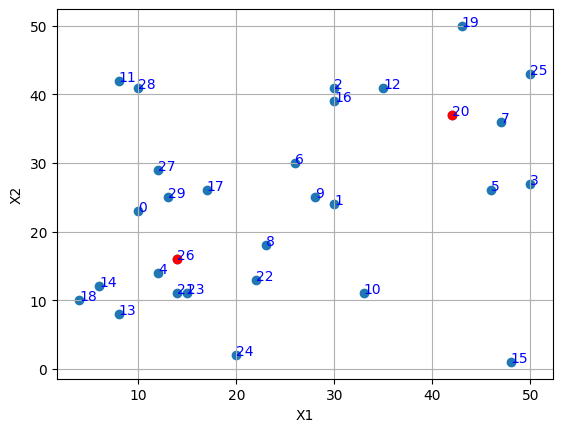

In [ ]:

plt.figure()
plt.scatter(df['x1'],df['x2'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()
for i in range(len(df)):
  plt.text(df['x1'][i],df['x2'][i],s= str(i), c='blue')


for j in instance.j:
  if instance.s[j].value>0:
    print(j)
    x0,y0 = df['x1'][j-1],df['x2'][j-1]
    plt.scatter(x0,y0,c='red')

$$f = \sum_i \alpha_i k(X_i,x) y_i +b$$